In [1]:
#Importing libraries
import numpy as np
import matplotlib.pyplot as plt

# One-dimensional methods

In [12]:
#Exhaustive search function

def exhaustive_search(f, a, b, epsilon=0.001):
    n = int((b - a) / epsilon)
    #First iteration and f_calculation
    x_min = a
    f_min = f(a)
    N = 1
    f_calc = 1
    
    #2nd+ iterations
    for i in range(1, n+1):
        N += 1
        x = a + i * epsilon
        
        #F-calc is performed in the if-statement
        f_calc += 1 
        
        if f(x) < f_min:
            f_min = f(x)
            x_min = x
    
    return x_min, f_min, N, f_calc

In [19]:
#Dichotomy function

def dichotomy(f, a, b, epsilon=0.001):
    # delta is in 0 to epsilon range
    delta = epsilon*0.5
    iteration_count = 0
    f_calc = 0
    while (b - a) / 2 > epsilon:
        iteration_count += 1
        middle = (a + b) / 2
        x1 = middle - delta/2
        x2 = middle + delta/2
        
        # 2 F_calc are performed
        f_calc += 2
        
        if f(x1) < f(x2):
            b = x2
        else:
            a = x1
    x_min = (a + b) / 2
    return x_min, f(x_min), iteration_count, f_calc

In [14]:
# Golden section search function

def golden_section(f, a, b, epsilon=0.001):
    iteration_count = 0
    f_calc = 0

    while b - a > epsilon:
        iteration_count += 1

        x1 = a + (3 - np.sqrt(5)) / 2 * (b - a)
        x2 = b + (np.sqrt(5) - 3) / 2 * (b - a)
        
        # 2 F_calc are performed
        f_calc += 2
        
        if f(x1) < f(x2):
            b = x2
            #a stays the same a1=a0
        else:
            a = x1
            #b stays the same

    x_min = (a + b) / 2
    return x_min, f(x_min), iteration_count, f_calc

In [20]:
# Implementation

# Functions
f1 = lambda x: x**3
f2 = lambda x: abs(x - 0.2)
f3 = lambda x: x * np.sin(1/x)

# Results
methods = [exhaustive_search, dichotomy, golden_section]
functions = [(f1, (0, 1)), (f2, (0, 1)), (f3, (0.01, 1))]

for idx, (f, domain) in enumerate(functions):
    print(f"Function {idx + 1}:")
    for method in methods:
        x_min, f_min, iterations, f_calc = method(f, *domain)
        print(f"Using {method.__name__}: x_min = {x_min}, f_min = {f_min}, iterations = {iterations}, f_calc = {f_calc}")
    print("\n")


Function 1:
Using exhaustive_search: x_min = 0, f_min = 0, iterations = 1001, f_calc = 1001
Using dichotomy: x_min = 0.000738037109375, f_min = 4.020079092442757e-10, iterations = 10, f_calc = 20
Using golden_section: x_min = 0.0003665687179287029, f_min = 4.9256800857728645e-11, iterations = 15, f_calc = 30


Function 2:
Using exhaustive_search: x_min = 0.2, f_min = 0.0, iterations = 1001, f_calc = 1001
Using dichotomy: x_min = 0.19985717773437495, f_min = 0.0001428222656250644, iterations = 10, f_calc = 20
Using golden_section: x_min = 0.20007331374358575, f_min = 7.331374358574005e-05, iterations = 15, f_calc = 30


Function 3:
Using exhaustive_search: x_min = 0.223, f_min = -0.21722461258083445, iterations = 991, f_calc = 991
Using dichotomy: x_min = 0.22235473632812497, f_min = -0.2172319697081324, iterations = 10, f_calc = 20
Using golden_section: x_min = 0.2227195936196033, f_min = -0.2172323281775325, iterations = 15, f_calc = 30




# Multidimensional methods

In [32]:
# Generating data
# For reproducible results
np.random.seed(41)

alpha = np.random.rand()
beta = np.random.rand()

x_data = np.array([k/100 for k in range(101)])

# Generate 101 random deltas with normal distribution N(0,1)
delta = np.random.randn(101)
y_data = alpha * x_data + beta + delta

In [33]:
# Functions (linear and rational)

def D_linear(params):
    a, b = params
    return np.sum((a * x_data + b - y_data) ** 2)

def D_rational(params):
    a, b = params
    return np.sum((a / (1 + b * x_data) - y_data) ** 2)

In [46]:
# Exhaustive search

def exhaustive_search_multi(f, bounds, epsilon=0.001):
    a, b = bounds
    n = int(1/epsilon) + 1
    f_min = float('inf')
    a_min, b_min = None, None
    iteration_count = 0
    f_calc = 0

    for i in np.linspace(a[0], b[0], n):
        for j in np.linspace(a[1], b[1], n):
            iteration_count += 1       # increment the iteration count
            f_calc += 1                # increment the function calculation count
            val = f((i, j))
            if val < f_min:
                f_min = val
                a_min, b_min = i, j
                
    return a_min, b_min, iteration_count, f_calc


In [49]:
# Gauss 

def direct_search_1D(f, a, b, epsilon=0.001):
    best_val = float('inf')
    best_x = None
    f_calc = 0

    for x in np.linspace(a, b, int(1/epsilon) + 1):  # We add +1 to ensure the range is [0,1] inclusive.
        f_calc += 1
        val = f(x)
        if val < best_val:
            best_val = val
            best_x = x

    return best_x, f_calc

def gauss(f, init, epsilon=0.001, max_iter=1000):
    a, b = init
    a_prev, b_prev = float('inf'), float('inf')
    iter_count = 0
    f_calc = 0

    while iter_count < max_iter:
        iter_count += 1

        # Optimize a with fixed b
        a, f_calcs_a = direct_search_1D(lambda a_val: f((a_val, b)), a-epsilon, a+epsilon, epsilon)
        f_calc += f_calcs_a

        # Optimize b with fixed a
        b, f_calcs_b = direct_search_1D(lambda b_val: f((a, b_val)), b-epsilon, b+epsilon, epsilon)
        f_calc += f_calcs_b

        # Stopping condition: if changes in both dimensions are smaller than epsilon
        if np.abs(a - a_prev) < epsilon and np.abs(b - b_prev) < epsilon:
            break

        # Update previous values
        a_prev, b_prev = a, b

    return a, b, iter_count, f_calc


In [43]:
# Nelder Mead

from scipy.optimize import fmin

result_linear_nelder = fmin(D_linear, [0,0], xtol=0.001)
result_rational_nelder = fmin(D_rational, [0,0], xtol=0.001)

Optimization terminated successfully.
         Current function value: 113.820999
         Iterations: 47
         Function evaluations: 91
Optimization terminated successfully.
         Current function value: 115.248226
         Iterations: 55
         Function evaluations: 106


# Exhaustive search results

Results for D_linear with Exhaustive Search:
Optimal parameters: a = 0.438 , b = 0.791
Number of iterations:  1002001
Function evaluations:  1002001


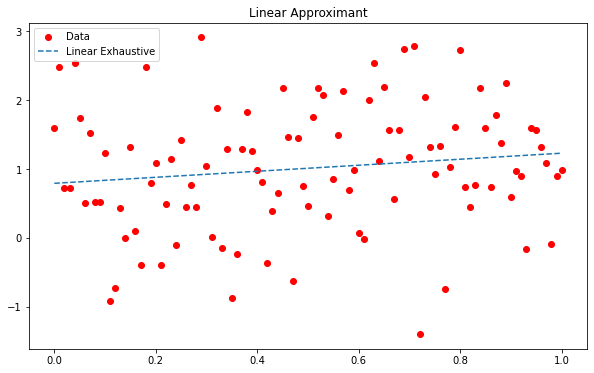

In [30]:
# Exhaustive search for linear function
a_exhaustive_linear, b_exhaustive_linear, iteration_count_exh_l, f_calc_exh_l = exhaustive_search_multi(D_linear, ([0, 0], [1, 1]), 0.001) 

# Print the results from exhaustive search
print("Results for D_linear with Exhaustive Search:")
print("Optimal parameters: a =", a_exhaustive_linear, ", b =", b_exhaustive_linear)
print("Number of iterations: ", iteration_count_exh_l)
print("Function evaluations: ", f_calc_exh_l)

# Plot for Linear Approximant
plt.figure(figsize=(10, 6))
plt.scatter(x_data, y_data, label='Data', color='red')

# Plotting results from Exhaustive Search
plt.plot(x_data, a_exhaustive_linear * x_data + b_exhaustive_linear, label='Linear Exhaustive', linestyle='--') 
plt.title('Linear Approximant')
plt.legend()
plt.show()

Results for D_rational with Exhaustive Search:
Optimal parameters: a = 0.017 , b = 0.0
Number of iterations:  1002001
Function evaluations:  1002001


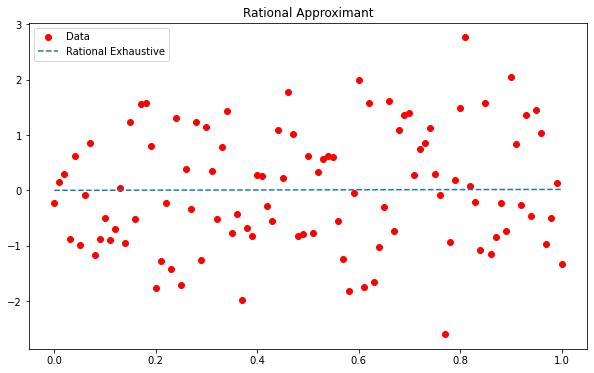

In [36]:
# Exhaustive search for rational function
a_exhaustive_rational, b_exhaustive_rational, iteration_count_exh_r, f_calc_exh_r = exhaustive_search_multi(D_rational, ([0, 0], [1, 1]), 0.001) 

# Print the results from exhaustive search
print("Results for D_rational with Exhaustive Search:")
print("Optimal parameters: a =", a_exhaustive_rational, ", b =", b_exhaustive_rational)
print("Number of iterations: ", iteration_count_exh_r)
print("Function evaluations: ", f_calc_exh_r)

# Plot for Linear Approximant
plt.figure(figsize=(10, 6))
plt.scatter(x_data, y_data, label='Data', color='red')

# Plotting results from Exhaustive Search
plt.plot(x_data, a_exhaustive_rational * x_data + b_exhaustive_rational, label='Rational Exhaustive', linestyle='--') 
plt.title('Rational Approximant')
plt.legend()
plt.show()

# Gauss (coordinate descent) method results

Results for D_linear with Gauss method:
Optimal parameters: a = 0.06300000000000004 , b = -0.01424400000000001
Number of iterations:  63
Function evaluations:  126126


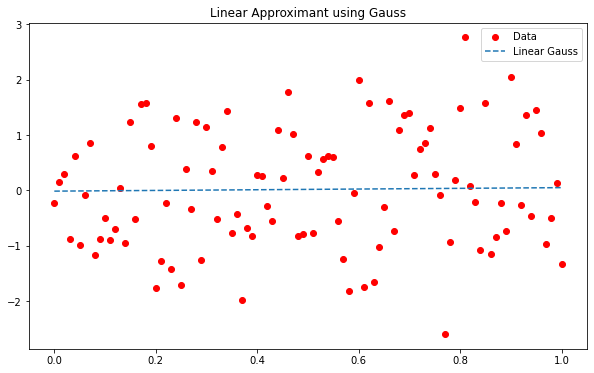

In [50]:
# Gauss search for linear function
a_gauss_linear, b_gauss_linear, iteration_count_gauss_l, f_calc_gauss_l = gauss(D_linear, [0, 0])

# Print the results from Gauss
print("Results for D_linear with Gauss method:")
print("Optimal parameters: a =", a_gauss_linear, ", b =", b_gauss_linear)
print("Number of iterations: ", iteration_count_gauss_l)
print("Function evaluations: ", f_calc_gauss_l)

# Plot for Linear Approximant
plt.figure(figsize=(10, 6))
plt.scatter(x_data, y_data, label='Data', color='red')

# Plotting results from Gauss
plt.plot(x_data, a_gauss_linear * x_data + b_gauss_linear, label='Linear Gauss', linestyle='--') 
plt.title('Linear Approximant using Gauss')
plt.legend()
plt.show()

Results for D_linear with Gauss method:
Optimal parameters: a = 0.019030000000000005 , b = -0.06300000000000004
Number of iterations:  63
Function evaluations:  126126


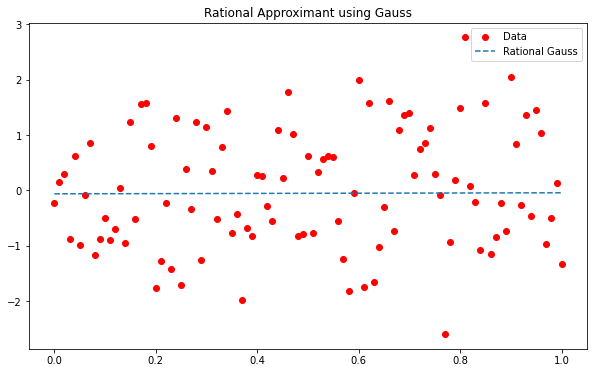

In [51]:
# Gauss search for linear function
a_gauss_rational, b_gauss_rational, iteration_count_gauss_r, f_calc_gauss_r = gauss(D_rational, [0, 0])

# Print the results from Gauss
print("Results for D_linear with Gauss method:")
print("Optimal parameters: a =", a_gauss_rational, ", b =", b_gauss_rational)
print("Number of iterations: ", iteration_count_gauss_r)
print("Function evaluations: ", f_calc_gauss_r)

# Plot for Linear Approximant
plt.figure(figsize=(10, 6))
plt.scatter(x_data, y_data, label='Data', color='red')

# Plotting results from Gauss
plt.plot(x_data, a_gauss_rational * x_data + b_gauss_rational, label='Rational Gauss', linestyle='--') 
plt.title('Rational Approximant using Gauss')
plt.legend()
plt.show()

# Nelder-Mead method results

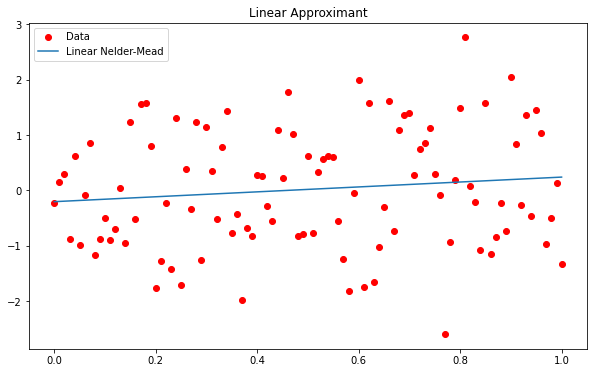

In [44]:
# Nelder-Mead method for linear function
plt.figure(figsize=(10, 6))
plt.scatter(x_data, y_data, label='Data', color='red')
plt.plot(x_data, result_linear_nelder[0] * x_data + result_linear_nelder[1], label='Linear Nelder-Mead')
# You can similarly add plots for exhaustive and Gauss methods
plt.title('Linear Approximant')
plt.legend()
plt.show()

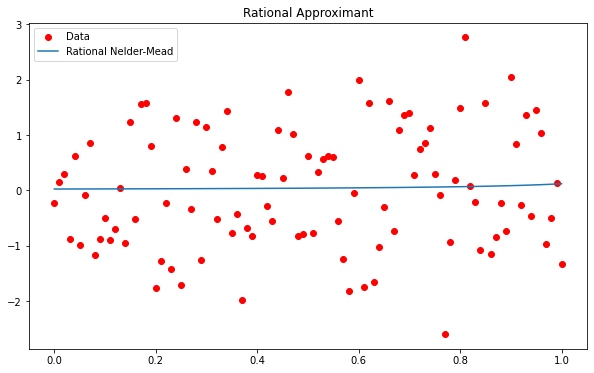

In [45]:
# Nelder-Mead method for rational function
plt.figure(figsize=(10, 6))
plt.scatter(x_data, y_data, label='Data', color='red')
plt.plot(x_data, result_rational_nelder[0] / (1 + result_rational_nelder[1] * x_data), label='Rational Nelder-Mead')
# Again, similarly add plots for exhaustive and Gauss methods
plt.title('Rational Approximant')
plt.legend()
plt.show()